#<center> ML Task 3 </center>
Today you'll be implementing your first **Machine Learning Algorithm**, how exciting!

The algorithm is divided into multiple functions, each represents a part that was explained during the session:
- Initialize weights and biases
- Make a prediction
- Calculate error/cost
- Calculate gradients (weight updates) to adjust the line
- Update Weights

<br>
Each function has a test below it to check your logic, running the test will either show an error with a hint or a <font color='green'>"Success!"</font> message.
<br><br>
You should also run your function and save it's outputs in variables as you'll need some function's output in next ones.
<br>

---
<br>

<h2>⭐⭐ Challenge ⭐⭐ </h2>

Implement a fully vectorized model, which means:
- You can't use any `for loops` except for the `fit()` function 
- You'll have to include the `bias` in the `weights` vector 
<font size=3, color='gray'>(you'll have to edit the actual data for this.)</font>

<br><br>

---
<font size=3, color='gray'>Some Content from this notebook has been adopted from the [Deeplearning.Ai's Machine Learning Specialization](https://www.deeplearning.ai/courses/machine-learning-specialization/)</font>


#Introduction

<h2> Dataset</h2>

You'll be using the **california housing** sample dataset to check your implementation steps, the dataset's description can be found [here](https://developers.google.com/machine-learning/crash-course/california-housing-data-description).

The data is already preprocessed, however you'll need to do 1 extra step later.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_path = "/content/sample_data/california_housing_train.csv"
data = pd.read_csv(data_path)
data = data.iloc[:1000, :] # We'll use only 1000 data samples

In [3]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-116.709970,33.178530,20.825000,3212.465000,651.963000,1579.355000,558.029000,3.422499,143689.602000
std,0.572927,0.603853,9.301123,2634.557551,536.881431,1167.885867,431.297776,1.537552,72594.233447
min,-117.100000,32.540000,2.000000,42.000000,10.000000,9.000000,3.000000,0.499900,14999.000000
25%,-117.060000,32.747500,15.000000,1593.500000,317.000000,816.000000,283.750000,2.264525,93200.000000
50%,-116.990000,32.850000,19.000000,2523.000000,511.000000,1305.500000,452.500000,3.132150,134050.000000
75%,-116.520000,33.710000,28.000000,3912.750000,788.250000,1997.750000,691.750000,4.221325,170850.000000
max,-114.310000,36.400000,52.000000,19107.000000,3923.000000,7985.000000,3232.000000,10.618600,500001.000000


In [4]:
data.head()
data=(data-np.mean(data))/(np.max(data)-np.min(data))
data

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.860204,0.262039,-0.1165,0.125861,0.161267,-0.070757,-0.026643,-0.190627,-0.158328
1,0.802857,0.316443,-0.0365,0.232758,0.319202,-0.056464,-0.029430,-0.158370,-0.131112
2,0.770599,0.132505,-0.0765,-0.130735,-0.122147,-0.156263,-0.136584,-0.175082,-0.119566
3,0.767014,0.119552,-0.1365,-0.089770,-0.080491,-0.133445,-0.102827,-0.022809,-0.144926
4,0.767014,0.101417,-0.0165,-0.092235,-0.083303,-0.119779,-0.091678,-0.147993,-0.161215
...,...,...,...,...,...,...,...,...,...
995,-0.136211,-0.162832,-0.2565,0.174169,0.144400,0.403416,0.191691,0.052952,0.001465
996,-0.139796,0.360484,-0.2965,0.099530,0.100188,0.044966,0.051400,-0.022809,-0.063690
997,-0.139796,0.267220,0.0235,0.062131,0.071310,-0.054458,-0.035004,0.109135,-0.072762
998,-0.139796,0.220588,0.0635,0.048861,0.044477,0.068662,0.066265,-0.089468,-0.098329


In [5]:
target_column_name = "median_house_value"

In [6]:
# Split data to features and target
X = data.drop([target_column_name], axis = 1).values # Features
Y = data[target_column_name].values # Target

In [7]:
print(f"Data has {data.shape[0]} samples and {data.shape[1]} features")

Data has 1000 samples and 9 features


# Visualizations

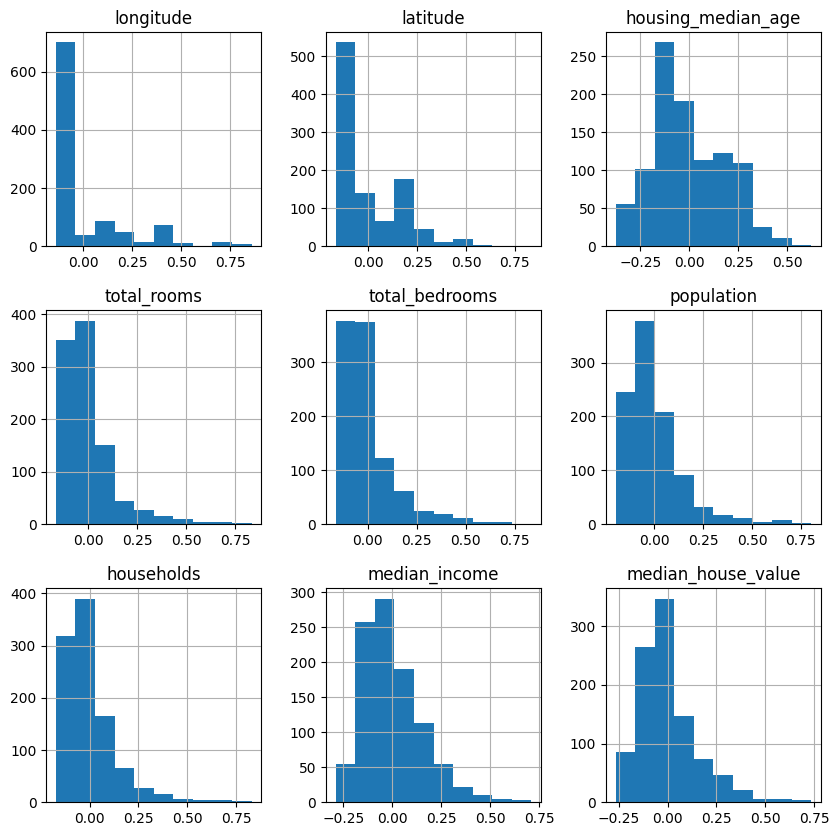

In [8]:
data.hist(figsize=(10,10))
plt.show()

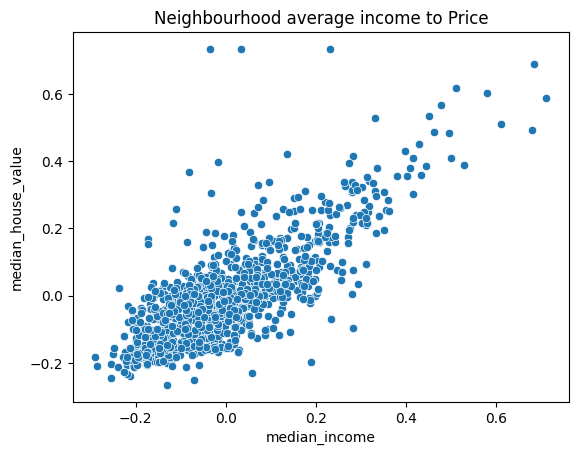

In [9]:
ax = sns.scatterplot(data=data, x = "median_income", y = target_column_name)
ax.set_title("Neighbourhood average income to Price")
plt.show()

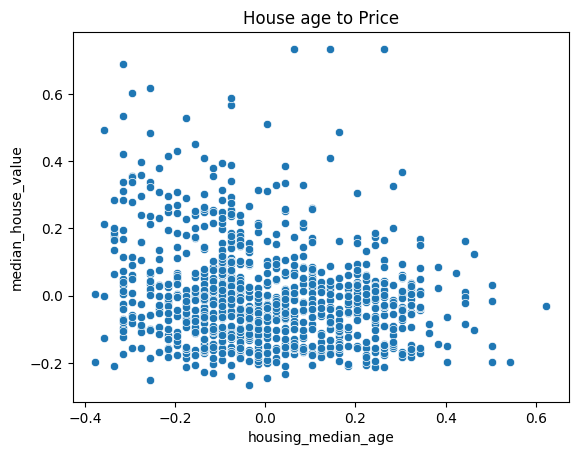

In [10]:
ax = sns.scatterplot(data=data, x = "housing_median_age", y = target_column_name)
ax.set_title("House age to Price")
plt.show()

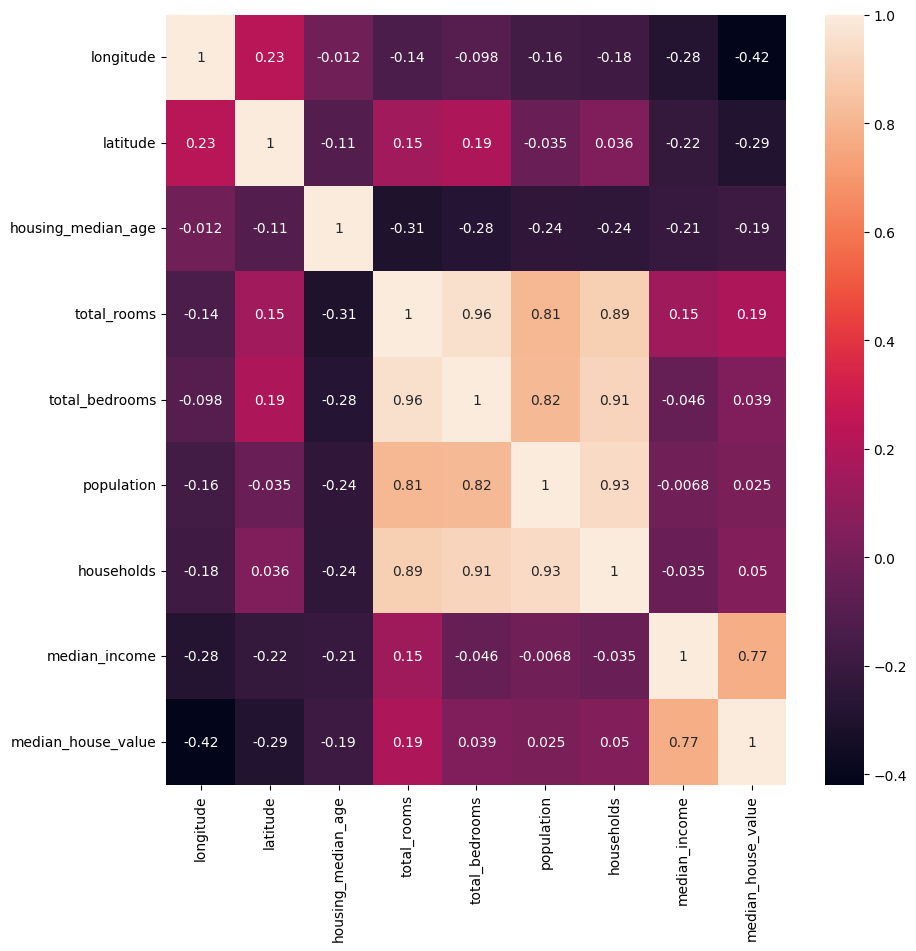

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

# Linear Regression Model

Note: use the variables `X` and `Y` as your features and labels, **Don't use the `data` variable**

<center>

**\>> Your Code starts here <<**</center>

## Initialize Model's weights and bias
You can initialize with zeros or small random number (which is preferred)

In [12]:
def init_weights(x: np.ndarray):
  """
  You should initialize your weights here, 
  remember that you should create 1 weight for each feature in the data
  Returns:
    w (ndarray):  a numpy array containing 1 weight for each feature in the data
    b (scalar) : a single number for the bias
  """
  w=np.random.randn(X.shape[1])
  b=np.random.randn(1)
  return w,b

In [13]:
# Run the above function here
init_weights(X.shape[1])

(array([-2.10128078,  0.89946959, -0.10392547,  0.64710534,  0.06095273,
         0.34350284,  0.45221072, -1.43613457]),
 array([0.73047848]))

## Model Prediction With Multiple Variables
The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{x} \cdot \mathbf{w} + b $$ 

In [14]:
def predict(x, w, b):
  """
    modern, vectorized, pythonic implementaion of predict 
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      prediction (scalar)
    """
  prediction=np.dot(w,x.transpose())+b #pred (1,1000) but it read (1000,1)
  #reshape != transpose
  return prediction

In [15]:
# Run the above function here
w,b=init_weights(X.shape[1])
predict(X,w,b).shape

(1000,)

## Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:

$$J(\mathbf{w},b) = \frac{1}{2m} Sum([Prediction - Y]^2)$$ 

- Prediction : a vector containing predictions for all data samples
- Y : a vector containing labels for all data samples

In [16]:
def compute_cost(predictions, labels, m):
  """
    Computes the mean_squared_error for all the dataset
    Args:
      predictions (ndarray (m,)): predicted values of all data
      labels (ndarray (m,)) : target values of all data
      m (scalar) : the count of data examples
      
    Returns:
      cost (scalar): cost
    """
  #cost is Avg of Error between prediction and real 
  cost=(1/(2*m))*sum((predictions-labels)**2)
  return cost 

In [17]:
# Run the above function here
compute_cost(predict(X,w,b),Y,X.shape[0])  # why cost is so big ? becouse , w,b is randam numbers  in first . we can reduces the cost by put bais nearly the min value in labels.                                                  

1.2591750916547892

## Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (
  prediction^{(i)} - y^{(i)})x_{j}^{(i)} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (prediction^{(i)} - y^{(i)}) \end{align}
$$
* m is the number of training examples in the data set

⭐Bonus⭐
- Implement a vectorized version for calculating gradients:
$$
\begin{align}
\frac{\partial J(\mathbf{W},b)}{\partial W}  &= \frac{1}{m}  
[X^T \cdot (Predictions - Y)] \end{align}$$
<br>
<center>(Bias equation is the same as above)</center>

- `X^T` is the whole dataset transposed not just an example
- `Predictions` are all the predictions for the data
- `Y` are all the labels for the data
    

In [18]:
def compute_gradient(x, labels, predictions, m):
  """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,n))         : Data, m examples with n features
      labels (ndarray (m,))     : target values
      predictions (ndarray (m,)): predicted values of all data
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of all the weights (1 gradient for each weight)
      dj_db (scalar)      :  The gradient of the bias
    """
  dj_dw=(1/m)*np.dot(x.transpose(),(predictions-labels))

  dj_db=(1/m)*np.sum(predictions-labels)
  return dj_dw , dj_db

In [19]:
# Run the above function here
dj_dw,dj_db=compute_gradient(X,Y,predict(X,w,b), X.shape[0])

## Update weights

$$\begin{align*}
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \; & \text{for j = 0..n-1 (for each weight in weights)}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline\newline
\end{align*}$$

⭐ Bonus ⭐

Implement a vectorized version of the updates equation:
$$\begin{align*}
& W = W -  \alpha \frac{\partial J(\mathbf{W},b)}{\partial W} \; \newline
&
\end{align*}$$

<center>(Bias equation is the same as above)</center>


- `W` is a vector(array) containing all weights
- $\frac{\partial J(\mathbf{W},b)}{\partial W}$ is a vector(array) ofthe gradients of weights

In [20]:
def update_weights(w, dj_dw, b, dj_db, alpha):
  """
    Args:
      w (ndarray)     : Shape (n,) model parameters
      dj_dw (ndarray) : Shape (n,) weights gradients

      b (scalar)      : model parameter 
      dj_db (scalar)  : bias gradient

      alpha (scalar)  : learning rate

    Returns:
      w (ndarray)     : Shape (n,) Updated weights
      b (scalar)      : Updated bias
  """
  w=w-alpha*dj_dw
  b=b-alpha*dj_db
  return w,b

In [21]:
# Run the above function here
alpha=.03

W,B=update_weights(w, dj_dw, b, dj_db, alpha)
B=int(B)
B

-1

## Fitting the model
aka. Learning/Training

<h2> Psuedo Code: </h2>

- initialize weights
- initialize bias

for each epoch:
- predict
- compute then print cost
- calculate gradients
- update weights

return learned parameters


In [22]:
def fit(x, labels, epochs, alpha):
  """
    Fits a linear regression line on the data using gradient descent
    (This function should be where you use all your other functions in)
    Args:
      x (ndarray (m,n))      : Data, m examples with n features
      labels (ndarray (m,))  : target values
      epochs (scalar)        : number of iterations done on all data
      alpha (scalar)         : learning rate
    Returns:
      learned parameters and cost_history
  """
  cost_history = [] # add cost after each epoch to this list and return it with the parameters
  w,b=init_weights(x.shape[1])
  for i in range(1,epochs+1):
    predicted=predict(x,w,b)
    cost=compute_cost(predicted,labels,x.shape[0])
    print("Cost for epoch{} : {}".format(i,cost))
    cost_history.append(cost)
    dj_dw,dj_db=compute_gradient(x,labels,predict(x,w,b), x.shape[0])
    w,b=update_weights(w, dj_dw, b, dj_db, alpha)
  return w,b,cost_history

In [23]:
epochs = 3 # <- add epochs count
alpha  =.5 # <- add learning rate between ]0,1]
learned_weights,learned_bias, cost_history = fit(X, Y, epochs, alpha)

Cost for epoch1 : 0.11116216167741248
Cost for epoch2 : 0.09051581961338548
Cost for epoch3 : 0.08198889885759696


In [24]:
print("Learned Weights: ", learned_weights)

Learned Weights:  [ 0.07856624 -0.1533093  -1.03674013 -1.51038411 -0.50136808 -0.10594318
 -0.59467389  0.1449591 ]


In [25]:
print("Learned Bias: ", learned_bias)

Learned Bias:  [0.02558554]


In [26]:
print("cost history: ", cost_history)

cost history:  [0.11116216167741248, 0.09051581961338548, 0.08198889885759696]


Visualizing the costs

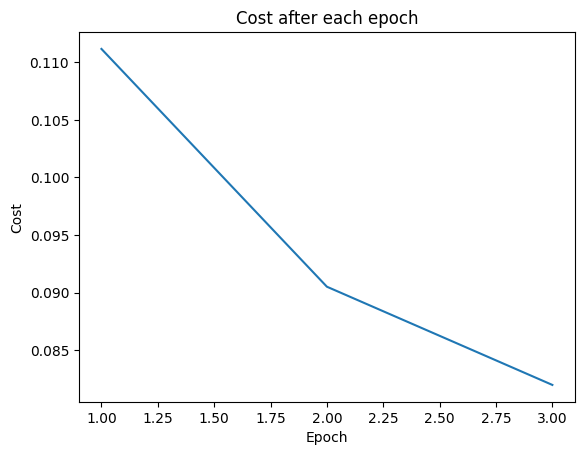

In [27]:
ax = sns.lineplot(x=np.arange(1,len(cost_history)+1), y=cost_history)
ax.set_title("Cost after each epoch")
ax.set_xlabel("Epoch")
ax.set_ylabel("Cost")
plt.show()


---
<center>
<font size=4, face='helvetica'>ML Committee</font><br>
<font size=5, color='#ffb71c'>S</font><font size=4, face='helvetica'>upport ASU </font></center>